# BERTopic with no adjustments

In [6]:
# Install required libraries
!pip install bertopic pandas matplotlib scikit-learn umap-learn hdbscan

2025-05-23 15:04:52,515 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/280 [00:00<?, ?it/s]

2025-05-23 15:05:32,993 - BERTopic - Embedding - Completed ✓
2025-05-23 15:05:32,996 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-23 15:06:35,213 - BERTopic - Dimensionality - Completed ✓
2025-05-23 15:06:35,216 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-23 15:06:35,718 - BERTopic - Cluster - Completed ✓
2025-05-23 15:06:35,719 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-05-23 15:06:36,592 - BERTopic - Representation - Completed ✓
2025-05-23 15:06:36,593 - BERTopic - Topic reduction - Reducing number of topics
2025-05-23 15:06:36,606 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-23 15:06:37,199 - BERTopic - Representation - Completed ✓
2025-05-23 15:06:37,201 - BERTopic - Topic reduction - Reduced number of topics from 177 to 10


Topic Info:
   Topic  Count                                        Name  \
0     -1   3107               -1_people_president_going_tax   
1      0   4459              0_president_people_think_going   
2      1    988                     1_respond_let_sir_thats   
3      2    114                   2_perot_mr_mondale_minute   
4      3    107             3_dollars_million_half_millions   
5      4     92                   4_gun_guns_think_violence   
6      5     36                       5_joe_jim_talk_months   
7      6     14            6_small_businesses_business_open   
8      7     12                        7_said_hes_okay_knew   
9      8     11  8_difference_differences_fundamental_think   

                                      Representation  \
0  [people, president, going, tax, thats, think, ...   
1  [president, people, think, going, senator, sai...   
2  [respond, let, sir, thats, seconds, true, ques...   
3  [perot, mr, mondale, minute, rebuttal, thank, ...   
4  [dollars, m

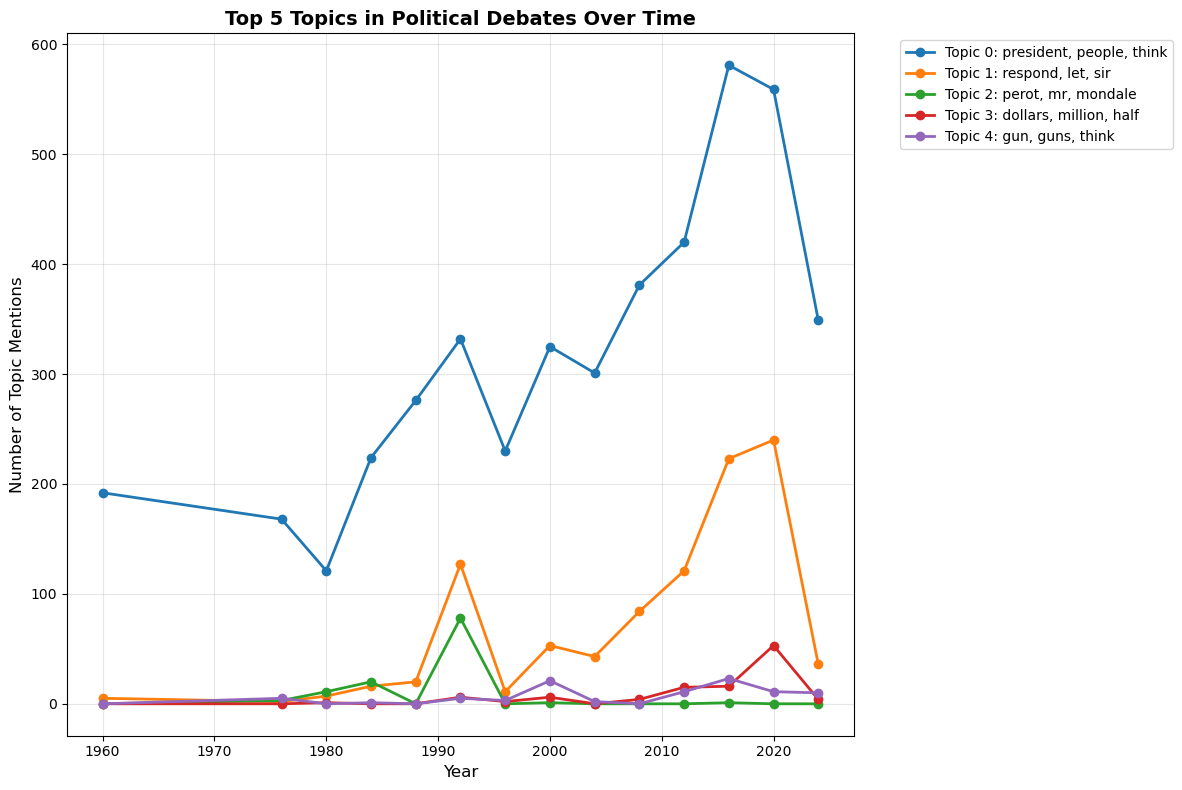


Detailed Topic Information:

Topic 0:
Words: president(0.036), people(0.031), think(0.028), going(0.028), senator(0.023), said(0.023), thats(0.022), want(0.022), dont(0.021), know(0.021)
Total mentions: 4459

Topic 1:
Words: respond(0.099), let(0.090), sir(0.087), thats(0.083), seconds(0.082), true(0.075), question(0.073), right(0.069), just(0.065), did(0.057)
Total mentions: 988

Topic 2:
Words: perot(0.535), mr(0.468), mondale(0.176), minute(0.176), rebuttal(0.096), thank(0.086), question(0.080), sorry(0.073), sir(0.071), goes(0.047)
Total mentions: 114

Topic 3:
Words: dollars(0.334), million(0.187), half(0.164), millions(0.143), going(0.130), billion(0.100), trillion(0.098), paid(0.090), son(0.088), money(0.073)
Total mentions: 107

Topic 4:
Words: gun(0.151), guns(0.117), think(0.058), violence(0.045), crime(0.044), law(0.041), weapons(0.040), amendment(0.039), people(0.038), second(0.038)
Total mentions: 92


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import re

# Load the data
df = pd.read_csv('debate_transcripts_cleaned.csv')

# Simple text preprocessing
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip()

# Preprocess dialogue column
df['dialogue_clean'] = df['dialogue'].apply(preprocess_text)

# Remove very short texts (less than 10 characters)
df = df[df['dialogue_clean'].str.len() >= 10]

# Create simple BERTopic model
vectorizer_model = CountVectorizer(max_features=1000, stop_words='english', min_df=2)
topic_model = BERTopic(
    vectorizer_model=vectorizer_model,
    nr_topics=10,  # Limit to 10 topics for simplicity
    verbose=True
)

# Fit the model
topics, probs = topic_model.fit_transform(df['dialogue_clean'].tolist())

# Add topics to dataframe
df['topic'] = topics

# Get topic info
topic_info = topic_model.get_topic_info()
print("Topic Info:")
print(topic_info.head(10))

# Calculate topic frequency by year for top 5 topics (excluding -1 which is outliers)
top_topics = topic_info[topic_info['Topic'] != -1].head(5)['Topic'].tolist()

# Create year-topic matrix
topic_by_year = []
years = sorted(df['year'].unique())

for topic in top_topics:
    topic_counts = []
    for year in years:
        count = len(df[(df['topic'] == topic) & (df['year'] == year)])
        topic_counts.append(count)
    topic_by_year.append(topic_counts)

# Plot the results
plt.figure(figsize=(12, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, topic in enumerate(top_topics):
    topic_words = topic_model.get_topic(topic)[:3]  # Get top 3 words
    topic_label = f"Topic {topic}: {', '.join([word for word, _ in topic_words])}"
    plt.plot(years, topic_by_year[i], marker='o', linewidth=2, 
             color=colors[i], label=topic_label)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Topic Mentions', fontsize=12)
plt.title('Top 5 Topics in Political Debates Over Time', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print topic details
print("\nDetailed Topic Information:")
for topic in top_topics:
    words = topic_model.get_topic(topic)[:10]
    print(f"\nTopic {topic}:")
    print(f"Words: {', '.join([f'{word}({score:.3f})' for word, score in words])}")
    print(f"Total mentions: {len(df[df['topic'] == topic])}")

2025-05-23 15:16:40,096 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/280 [00:00<?, ?it/s]

2025-05-23 15:17:25,806 - BERTopic - Embedding - Completed ✓
2025-05-23 15:17:25,808 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-23 15:18:30,428 - BERTopic - Dimensionality - Completed ✓
2025-05-23 15:18:30,436 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-23 15:18:30,919 - BERTopic - Cluster - Completed ✓
2025-05-23 15:18:30,920 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-05-23 15:18:31,588 - BERTopic - Representation - Completed ✓
2025-05-23 15:18:31,591 - BERTopic - Topic reduction - Reducing number of topics
2025-05-23 15:18:31,617 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-23 15:18:32,117 - BERTopic - Representation - Completed ✓
2025-05-23 15:18:32,123 - BERTopic - Topic reduction - Reduced number of topics from 170 to 10


Topic Info:
   Topic  Count                                        Name  \
0     -1   2922               -1_people_going_president_tax   
1      0   4676              0_president_people_think_going   
2      1    957                    1_respond_let_thats_true   
3      2    146             2_perot_mondale_minute_rebuttal   
4      3     66          3_dollars_million_small_businesses   
5      4     55                4_said_people_knew_president   
6      5     48                    5_law_texas_laws_changed   
7      6     37                        6_joe_jim_built_talk   
8      7     21               7_cities_families_family_talk   
9      8     12  8_difference_differences_fundamental_think   

                                      Representation  \
0  [people, going, president, tax, think, thats, ...   
1  [president, people, think, going, thats, senat...   
2  [respond, let, thats, true, question, just, ri...   
3  [perot, mondale, minute, rebuttal, thank, ques...   
4  [dollars, m

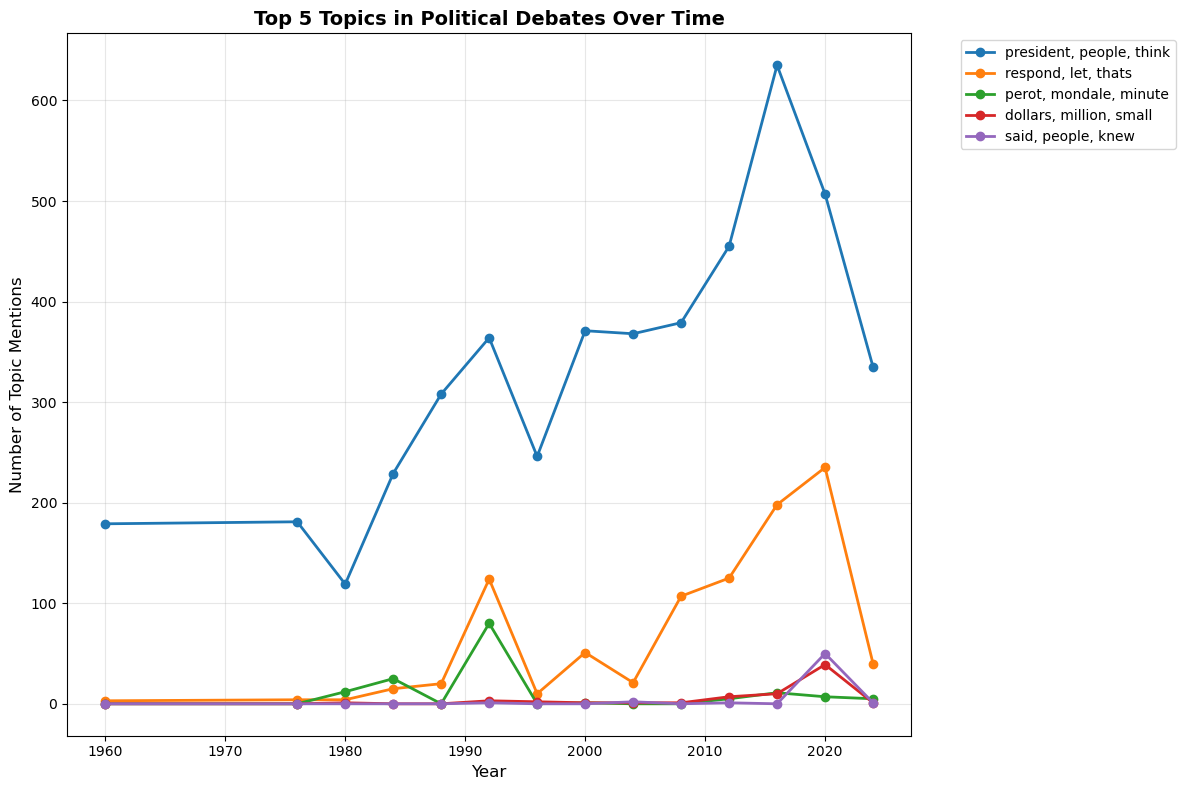


Detailed Topic Information:

Topic 0 - president, people, think:
Words: president(0.036), people(0.031), think(0.030), going(0.028), thats(0.023), senator(0.023), said(0.022), want(0.021), dont(0.021), know(0.021)
Total mentions: 4676

Topic 1 - respond, let, thats:
Words: respond(0.108), let(0.099), thats(0.098), true(0.089), question(0.086), just(0.076), right(0.071), sir(0.070), did(0.070), answer(0.063)
Total mentions: 957

Topic 2 - perot, mondale, minute:
Words: perot(0.578), mondale(0.210), minute(0.189), rebuttal(0.124), thank(0.123), question(0.086), sorry(0.078), sir(0.076), time(0.056), goes(0.051)
Total mentions: 146

Topic 3 - dollars, million, small:
Words: dollars(0.365), million(0.205), small(0.181), businesses(0.168), half(0.165), millions(0.157), billion(0.121), paid(0.115), trillion(0.108), business(0.097)
Total mentions: 66

Topic 4 - said, people, knew:
Words: said(0.088), people(0.071), knew(0.063), president(0.057), trump(0.043), didnt(0.042), say(0.042), americ

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
import re

# Load the data
df = pd.read_csv('debate_transcripts_cleaned.csv')

# Simple text preprocessing
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip()

df['dialogue_clean'] = df['dialogue'].apply(preprocess_text)
df = df[df['dialogue_clean'].str.len() >= 10]

# Custom tokenizer that removes stopwords and short words automatically
def custom_tokenizer(text):
    words = re.findall(r'\b[a-z]{3,}\b', text.lower())  # Keep only words with 3+ letters
    return [word for word in words if word not in ENGLISH_STOP_WORDS]

# Vectorizer with custom tokenizer
vectorizer_model = CountVectorizer(
    max_features=1000,
    tokenizer=custom_tokenizer,
    lowercase=True,
    min_df=2
)

# Create BERTopic model
topic_model = BERTopic(
    vectorizer_model=vectorizer_model,
    nr_topics=10,
    verbose=True
)

# Fit model
topics, probs = topic_model.fit_transform(df['dialogue_clean'].tolist())
df['topic'] = topics

# Get topic info
topic_info = topic_model.get_topic_info()
print("Topic Info:")
print(topic_info.head(10))

# Get top topics (excluding -1)
top_topics = topic_info[topic_info['Topic'] != -1].head(5)['Topic'].tolist()

# Year-topic matrix
topic_by_year = []
years = sorted(df['year'].unique())

for topic in top_topics:
    topic_counts = [len(df[(df['topic'] == topic) & (df['year'] == year)]) for year in years]
    topic_by_year.append(topic_counts)

# Plot
plt.figure(figsize=(12, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, topic in enumerate(top_topics):
    topic_words = topic_model.get_topic(topic)[:3]
    topic_label = f"{', '.join([word for word, _ in topic_words])}"
    plt.plot(years, topic_by_year[i], marker='o', linewidth=2, color=colors[i], label=topic_label)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Topic Mentions', fontsize=12)
plt.title('Top 5 Topics in Political Debates Over Time', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print detailed topic info
print("\nDetailed Topic Information:")
for topic in top_topics:
    words = topic_model.get_topic(topic)[:10]
    print(f"\nTopic {topic} - {', '.join([word for word, _ in words[:3]])}:")
    print(f"Words: {', '.join([f'{word}({score:.3f})' for word, score in words])}")
    print(f"Total mentions: {len(df[df['topic'] == topic])}")

2025-05-23 16:14:30,605 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/280 [00:00<?, ?it/s]

2025-05-23 16:15:13,101 - BERTopic - Embedding - Completed ✓
2025-05-23 16:15:13,103 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-23 16:16:20,016 - BERTopic - Dimensionality - Completed ✓
2025-05-23 16:16:20,019 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-23 16:16:20,521 - BERTopic - Cluster - Completed ✓
2025-05-23 16:16:20,533 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-23 16:16:21,204 - BERTopic - Representation - Completed ✓
2025-05-23 16:16:21,980 - BERTopic - Topic reduction - Reducing number of topics
2025-05-23 16:16:21,992 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-23 16:16:22,406 - BERTopic - Representation - Completed ✓
2025-05-23 16:16:22,408 - BERTopic - Topic reduction - Reduced number of topics from 163 to 10


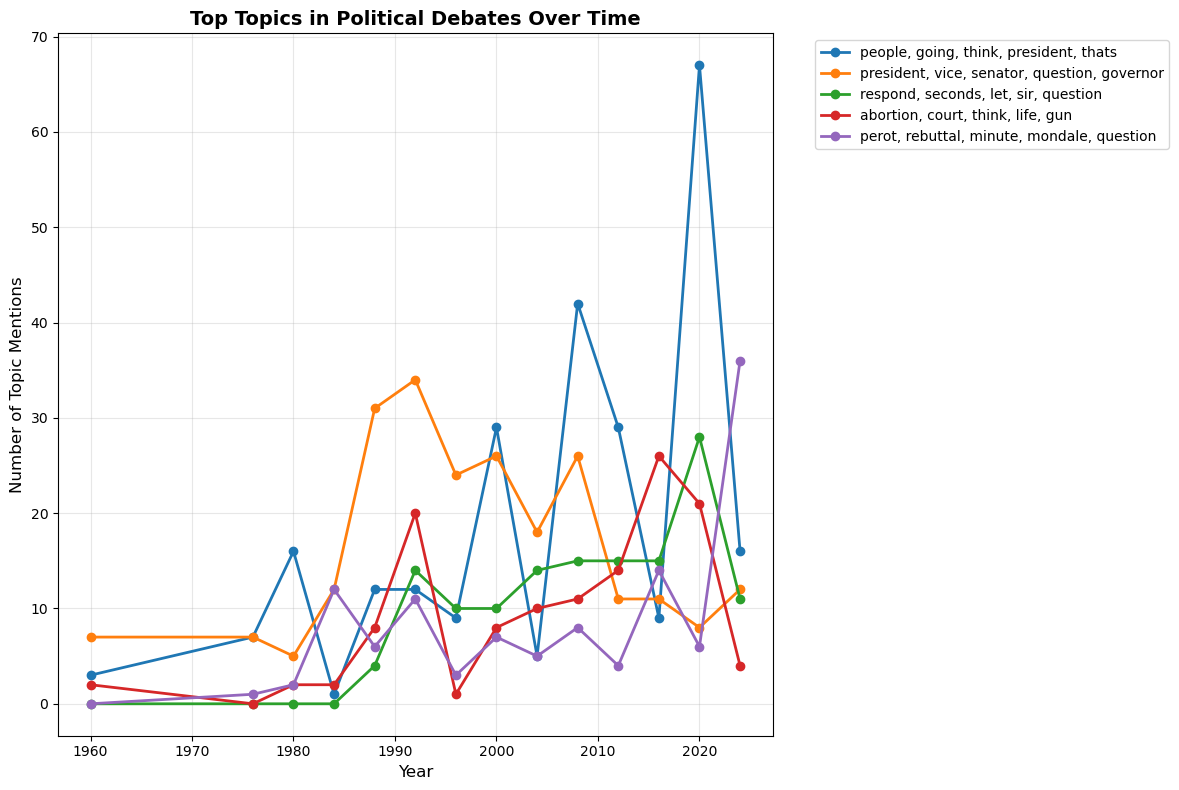


Reduced Topic Information:

people, going, think, president, thats (Topic 0):
Words: people(0.033), going(0.030), think(0.030), president(0.025), thats(0.024), said(0.023), know(0.022), country(0.022), just(0.022), want(0.021)
Mentions: 257

president, vice, senator, question, governor (Topic 1):
Words: president(0.128), vice(0.103), senator(0.102), question(0.087), governor(0.080), thank(0.075), minutes(0.059), debate(0.056), candidates(0.051), presidential(0.045)
Mentions: 232

respond, seconds, let, sir, question (Topic 2):
Words: respond(0.115), seconds(0.109), let(0.093), sir(0.088), question(0.081), true(0.075), just(0.071), time(0.067), thats(0.065), right(0.065)
Mentions: 136

abortion, court, think, life, gun (Topic 3):
Words: abortion(0.062), court(0.061), think(0.049), life(0.044), gun(0.041), supreme(0.040), people(0.038), believe(0.037), dont(0.036), thats(0.035)
Mentions: 129

perot, rebuttal, minute, mondale, question (Topic 4):
Words: perot(0.575), rebuttal(0.407), min

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sentence_transformers import SentenceTransformer
import re

# Load the data
df = pd.read_csv('debate_transcripts_cleaned.csv')

# Preprocess text
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['dialogue_clean'] = df['dialogue'].apply(preprocess_text)
df = df[df['dialogue_clean'].str.len() >= 10]

# Custom tokenizer
def custom_tokenizer(text):
    words = re.findall(r'\b[a-z]{3,}\b', text.lower())
    return [word for word in words if word not in ENGLISH_STOP_WORDS]

vectorizer_model = CountVectorizer(
    max_features=1000,
    tokenizer=custom_tokenizer,
    min_df=2
)

# Use good embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Create initial model with many topics
topic_model = BERTopic(
    vectorizer_model=vectorizer_model,
    embedding_model=embedding_model,
    verbose=True
)

# Fit model
docs = df['dialogue_clean'].tolist()
topics, probs = topic_model.fit_transform(docs)
df['topic'] = topics

# Reduce to ~10 meta-topics
topic_model.reduce_topics(docs, nr_topics=10)

# Get reduced topic info
reduced_info = topic_model.get_topic_info()
top_topics = reduced_info[reduced_info['Topic'] != -1].head(5)['Topic'].tolist()

# Optional: Rename reduced topics based on their top words
# You can customize these labels
topic_labels = {}
for topic_id in top_topics:
    words = [w for w, _ in topic_model.get_topic(topic_id)[:5]]
    label = ", ".join(words)
    topic_labels[topic_id] = label  # You can rename these after printing them

# Plot topic mentions over years
years = sorted(df['year'].unique())
topic_by_year = []

for topic in top_topics:
    counts = [len(df[(df['topic'] == topic) & (df['year'] == year)]) for year in years]
    topic_by_year.append(counts)

plt.figure(figsize=(12, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, topic in enumerate(top_topics):
    label = f"{topic_labels.get(topic, f'Topic {topic}')}"
    plt.plot(years, topic_by_year[i], marker='o', linewidth=2,
             color=colors[i % len(colors)], label=label)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Topic Mentions', fontsize=12)
plt.title('Top Topics in Political Debates Over Time', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print topic details
print("\nReduced Topic Information:")
for topic in top_topics:
    words = topic_model.get_topic(topic)[:10]
    print(f"\n{topic_labels[topic]} (Topic {topic}):")
    print(f"Words: {', '.join([f'{word}({score:.3f})' for word, score in words])}")
    print(f"Mentions: {len(df[df['topic'] == topic])}")


# Forced BERTopic on certain topics (not ideal)

2025-05-23 15:38:14,224 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/280 [00:00<?, ?it/s]

2025-05-23 16:05:17,292 - BERTopic - Embedding - Completed ✓
2025-05-23 16:05:17,294 - BERTopic - Guided - Find embeddings highly related to seeded topics.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2025-05-23 16:05:19,969 - BERTopic - Guided - Completed ✓
2025-05-23 16:05:19,971 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-23 16:05:57,205 - BERTopic - Dimensionality - Completed ✓
2025-05-23 16:05:57,208 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-23 16:05:57,709 - BERTopic - Cluster - Completed ✓
2025-05-23 16:05:57,715 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-23 16:05:58,390 - BERTopic - Representation - Completed ✓


Topic Info:
   Topic  Count                                      Name  \
0     -1   3078                  -1_tax_jobs_going_people   
1      0    219              0_future_campaign_ive_people   
2      1    150              1_tax_taxes_inflation_income   
3      2    148  2_candidates_debate_presidential_debates   
4      3    138              3_troops_military_war_forces   
5      4    124                4_seconds_minutes_time_sir   
6      5    123                 5_abortion_roe_life_woman   
7      6    101       6_schools_school_teachers_education   
8      7    100      7_border_immigration_borders_illegal   
9      8     97        8_insurance_health_care_healthcare   

                                      Representation  \
0  [tax, jobs, going, people, economy, thats, ame...   
1  [future, campaign, ive, people, country, ameri...   
2  [tax, taxes, inflation, income, jobs, rate, bu...   
3  [candidates, debate, presidential, debates, qu...   
4  [troops, military, war, forces, m

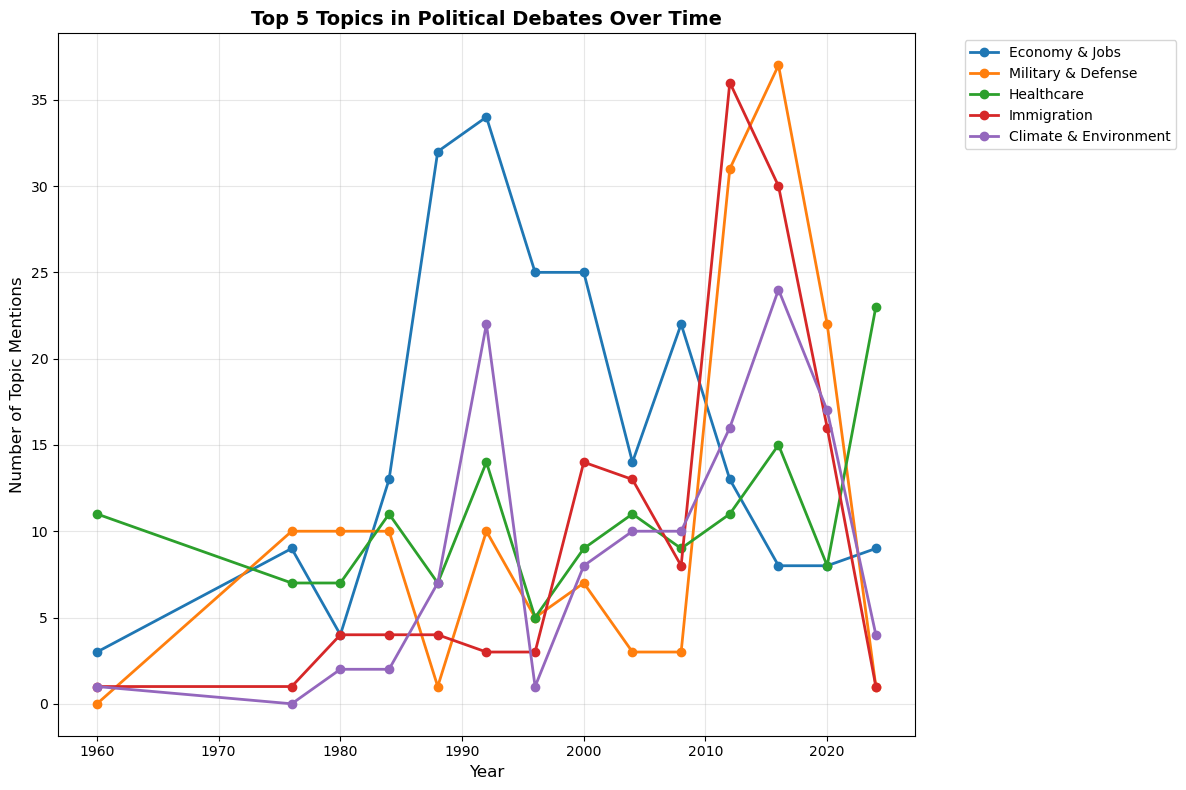


Detailed Topic Information:

Economy & Jobs (Topic 0):
Words: future(0.009), campaign(0.009), ive(0.008), people(0.008), country(0.008), america(0.008), thank(0.008), american(0.007), years(0.007), think(0.007)
Total mentions: 219

Military & Defense (Topic 1):
Words: tax(0.037), taxes(0.034), inflation(0.027), income(0.026), jobs(0.020), rate(0.018), businesses(0.017), percent(0.015), paid(0.014), pay(0.014)
Total mentions: 150

Healthcare (Topic 2):
Words: candidates(0.063), debate(0.053), presidential(0.051), debates(0.043), questions(0.035), evening(0.035), university(0.034), candidate(0.034), news(0.033), welcome(0.028)
Total mentions: 148

Immigration (Topic 3):
Words: troops(0.050), military(0.049), war(0.023), forces(0.021), mission(0.018), strategy(0.017), win(0.012), iraq(0.012), defend(0.011), defeat(0.010)
Total mentions: 138

Climate & Environment (Topic 4):
Words: seconds(0.196), minutes(0.147), time(0.098), sir(0.095), minute(0.087), equal(0.046), excuse(0.045), wait(0.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sentence_transformers import SentenceTransformer
import re

# Load the data
df = pd.read_csv('debate_transcripts_cleaned.csv')

# Preprocessing
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['dialogue_clean'] = df['dialogue'].apply(preprocess_text)
df = df[df['dialogue_clean'].str.len() >= 10]

# Custom tokenizer
def custom_tokenizer(text):
    words = re.findall(r'\b[a-z]{3,}\b', text.lower())
    return [word for word in words if word not in ENGLISH_STOP_WORDS]

# Vectorizer
vectorizer_model = CountVectorizer(
    max_features=1000,
    tokenizer=custom_tokenizer,
    min_df=2
)

# Focused seed topics
seed_topic_list = [
    ["economy", "jobs", "inflation", "tax"],
    ["military", "war", "troops", "defense"],
    ["healthcare", "insurance", "hospital", "medical"],
    ["immigration", "border", "illegal", "citizenship"],
    ["climate", "environment", "carbon", "emissions"]
]

# Sentence embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# BERTopic with seeded guidance
topic_model = BERTopic(
    vectorizer_model=vectorizer_model,
    embedding_model=embedding_model,
    seed_topic_list=seed_topic_list,
    verbose=True
)

# Fit model
topics, probs = topic_model.fit_transform(df['dialogue_clean'].tolist())
df['topic'] = topics

# Topic info
topic_info = topic_model.get_topic_info()
print("Topic Info:")
print(topic_info.head(10))

# Focus on top 5 topics (ignore -1 for outliers)
top_topics = topic_info[topic_info['Topic'] != -1].head(5)['Topic'].tolist()

# Descriptive names for these topics (based on your seed list order)
topic_names = {
    top_topics[0]: "Economy & Jobs",
    top_topics[1]: "Military & Defense",
    top_topics[2]: "Healthcare",
    top_topics[3]: "Immigration",
    top_topics[4]: "Climate & Environment"
}

# Year-topic matrix
topic_by_year = []
years = sorted(df['year'].unique())

for topic in top_topics:
    topic_counts = [len(df[(df['topic'] == topic) & (df['year'] == year)]) for year in years]
    topic_by_year.append(topic_counts)

# Plot
plt.figure(figsize=(12, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, topic in enumerate(top_topics):
    topic_label = topic_names.get(topic, f"Topic {topic}")
    plt.plot(years, topic_by_year[i], marker='o', linewidth=2, color=colors[i], label=topic_label)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Topic Mentions', fontsize=12)
plt.title('Top 5 Topics in Political Debates Over Time', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print detailed topic info
print("\nDetailed Topic Information:")
for topic in top_topics:
    words = topic_model.get_topic(topic)[:10]
    title = topic_names.get(topic, f"Topic {topic}")
    print(f"\n{title} (Topic {topic}):")
    print(f"Words: {', '.join([f'{word}({score:.3f})' for word, score in words])}")
    print(f"Total mentions: {len(df[df['topic'] == topic])}")


In [1]:
!pip install pandas matplotlib re
!pip install bertopic keybert
!pip install sentence-transformers

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [keybert]m3/4 [keybert]-it-py]


# BERTopic + KeyBERT (Labeling automatically the topics generated by BERTopic)

Substack link: https://stackoverflow.com/questions/75161203/labeling-automatically-the-topics-generated-by-bertopic

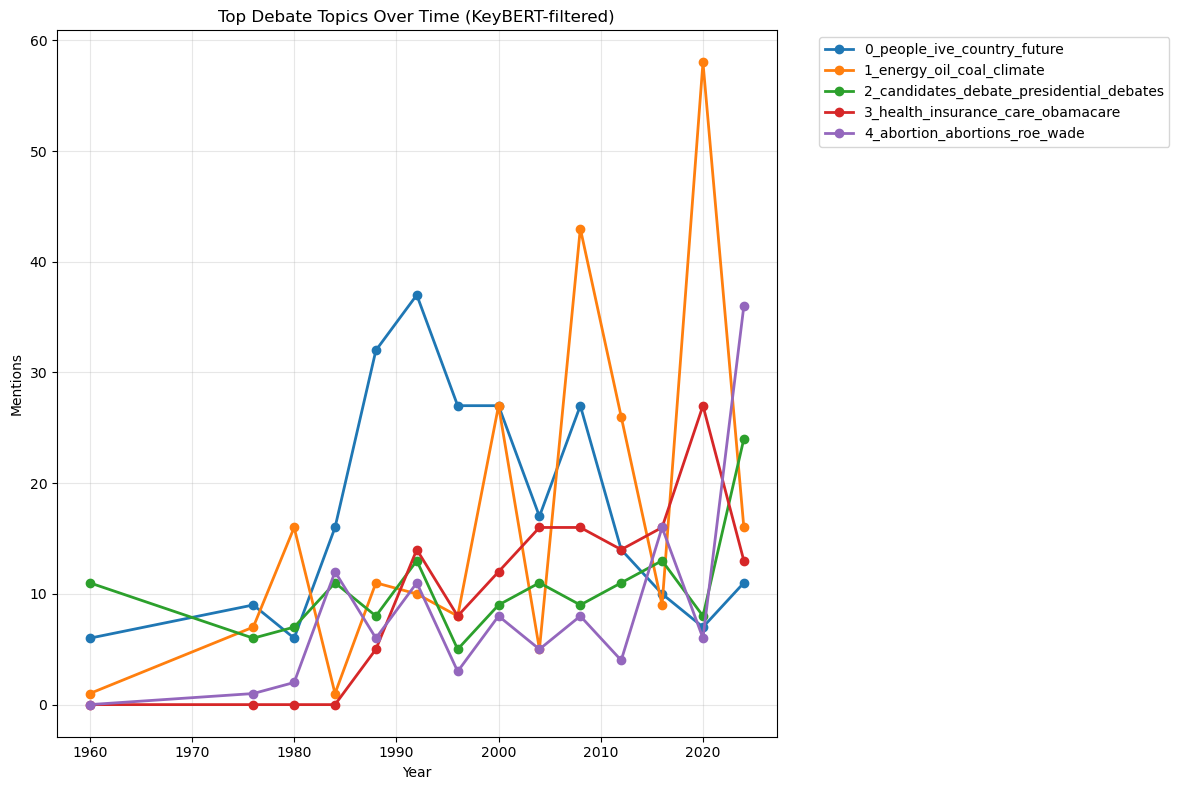


Topic 0 (0_people_ive_country_future):
[('people', np.float64(0.007665363691714656)), ('ive', np.float64(0.0074822565893683055)), ('country', np.float64(0.007408880898405764)), ('future', np.float64(0.0072562266446805695)), ('campaign', np.float64(0.007225808694386391)), ('thank', np.float64(0.007138246011997063)), ('america', np.float64(0.006736987001853252)), ('american', np.float64(0.006262683361903835)), ('years', np.float64(0.006130703826990623)), ('think', np.float64(0.006074192502545812))]

Topic 1 (1_energy_oil_coal_climate):
[('energy', np.float64(0.03099401225228063)), ('oil', np.float64(0.03068981160289749)), ('coal', np.float64(0.021342453267414612)), ('climate', np.float64(0.018744961420473993)), ('gas', np.float64(0.01700533603836182)), ('environment', np.float64(0.015529144369289835)), ('water', np.float64(0.012793045415397454)), ('production', np.float64(0.01168536323071454)), ('environmental', np.float64(0.010988163015089434)), ('drilling', np.float64(0.00985376524916

In [2]:
import pandas as pd
import re
from keybert import KeyBERT
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt

# Load and preprocess
df = pd.read_csv("debate_transcripts_cleaned.csv")

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['dialogue_clean'] = df['dialogue'].apply(preprocess)
df = df[df['dialogue_clean'].str.len() > 10]
docs = df['dialogue_clean'].tolist()

# Step 1: Extract key vocabulary using KeyBERT
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(docs, stop_words="english", top_n=5, use_maxsum=True)

# Flatten keywords to build vocabulary
vocab = list(set([kw for kws in keywords for kw, _ in kws]))

# Step 2: Build a CountVectorizer using this vocabulary
vectorizer_model = CountVectorizer(vocabulary=vocab)

# Step 3: Create BERTopic model using SentenceTransformer + curated vocabulary
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
topic_model = BERTopic(embedding_model=embedding_model, vectorizer_model=vectorizer_model)

# Step 4: Fit the model
topics, probs = topic_model.fit_transform(docs)
df['topic'] = topics

# Step 5: Generate clean topic labels (1 keyword only)
topic_model.generate_topic_labels(nr_words=1)

# Step 6: Plot top topic trends over time
topic_info = topic_model.get_topic_info()
top_topics = topic_info[topic_info.Topic != -1].head(5)['Topic'].tolist()
years = sorted(df['year'].unique())
topic_by_year = []

for topic in top_topics:
    counts = [len(df[(df['topic'] == topic) & (df['year'] == year)]) for year in years]
    topic_by_year.append(counts)

plt.figure(figsize=(12, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, topic in enumerate(top_topics):
    label = topic_model.topic_labels_[topic]
    plt.plot(years, topic_by_year[i], marker='o', linewidth=2,
             color=colors[i % len(colors)], label=label)

plt.xlabel("Year")
plt.ylabel("Mentions")
plt.title("Top Debate Topics Over Time (KeyBERT-filtered)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: print topic labels and top words
for topic in top_topics:
    print(f"\nTopic {topic} ({topic_model.topic_labels_[topic]}):")
    print(topic_model.get_topic(topic))


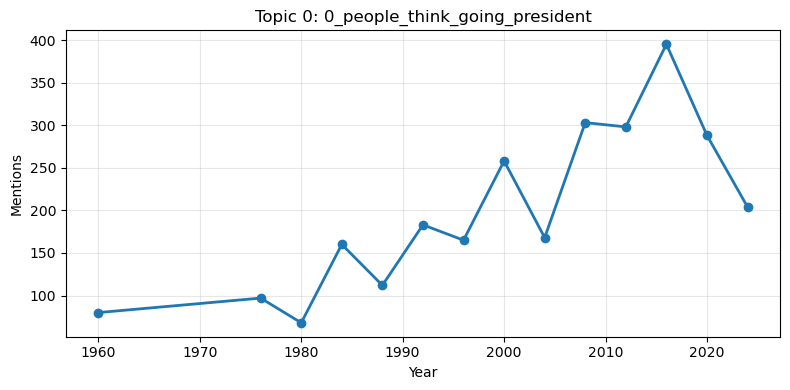

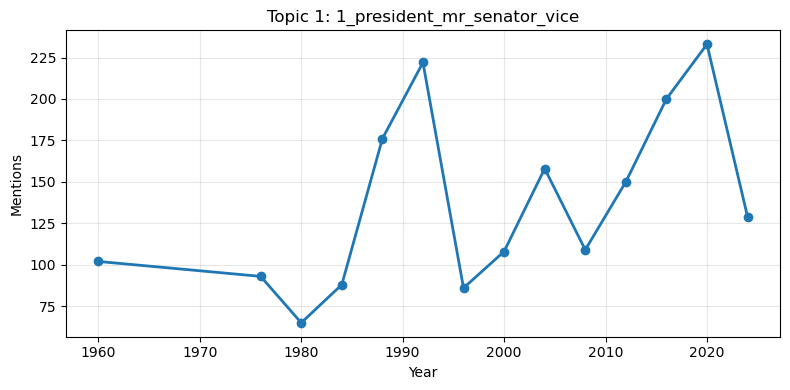

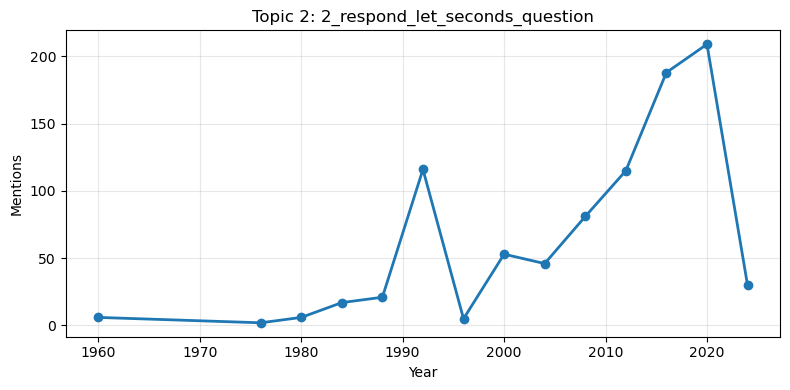

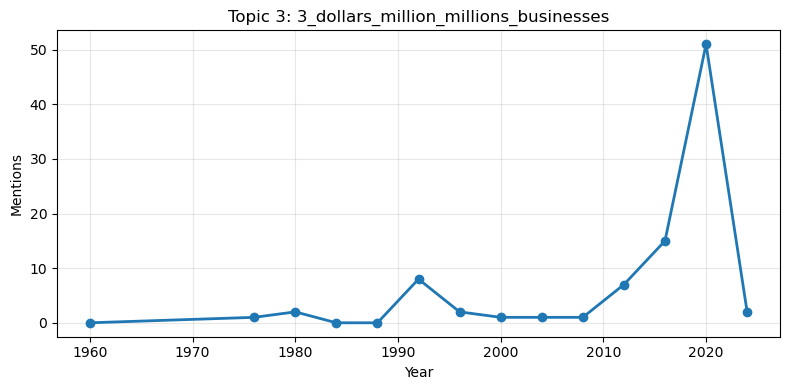

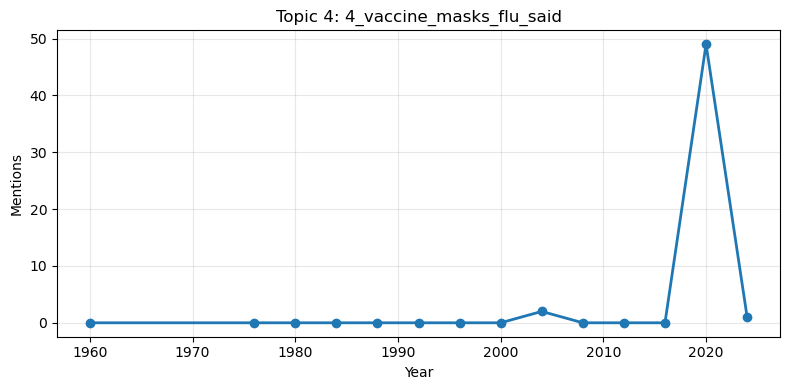

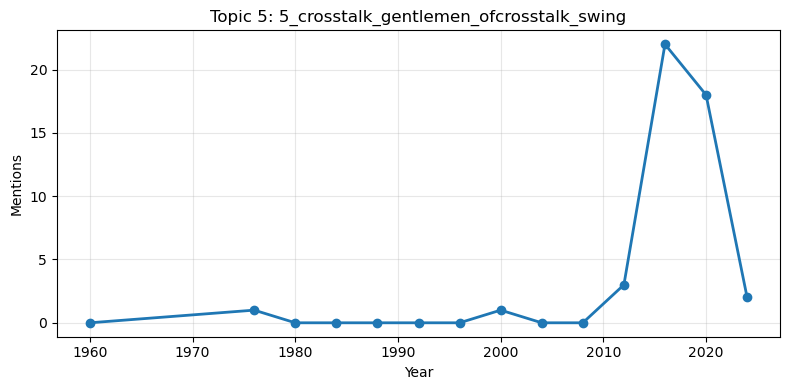

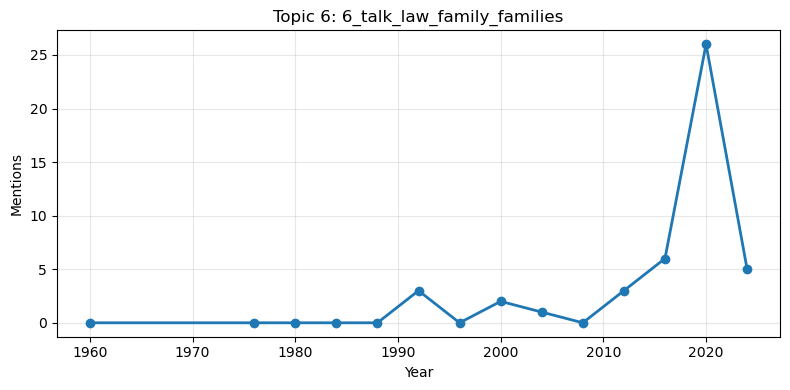

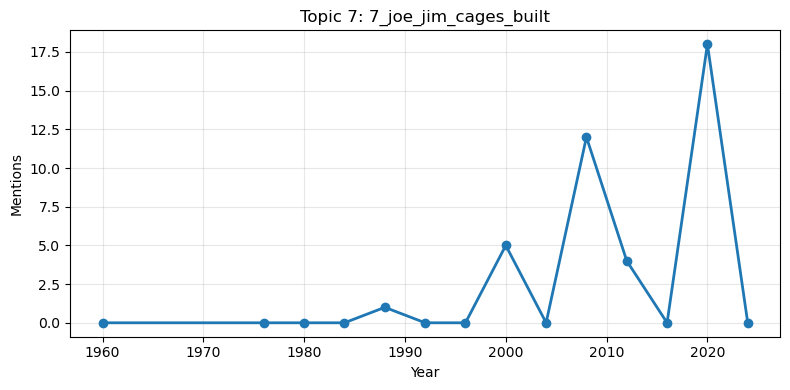

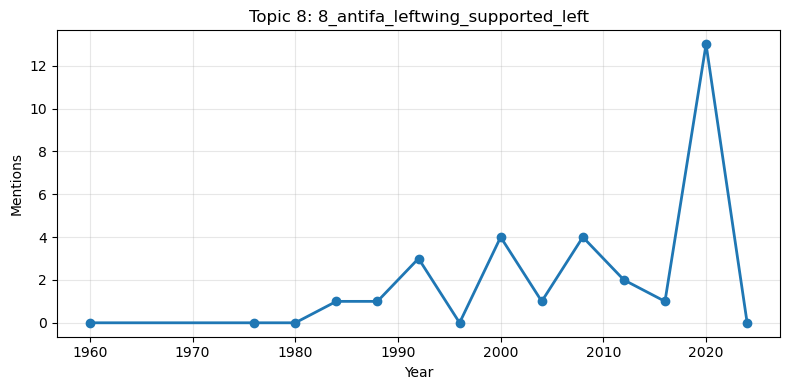

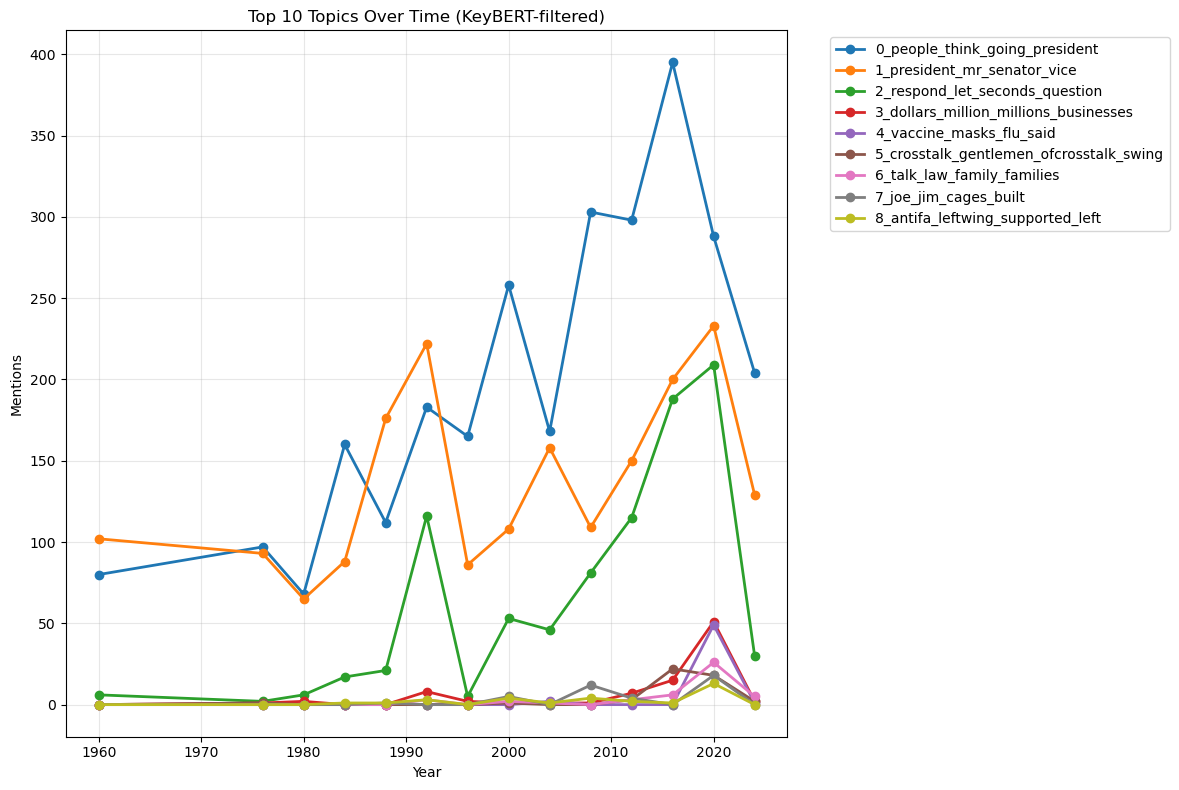

In [3]:
import pandas as pd
import re
from keybert import KeyBERT
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt

# Load and preprocess
df = pd.read_csv("debate_transcripts_cleaned.csv")

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['dialogue_clean'] = df['dialogue'].apply(preprocess)
df = df[df['dialogue_clean'].str.len() > 10]
docs = df['dialogue_clean'].tolist()

# Extract vocabulary using KeyBERT
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(docs, stop_words="english", top_n=5, use_maxsum=True)
vocab = list(set([kw for kws in keywords for kw, _ in kws]))

# Vectorizer and embedding model
vectorizer_model = CountVectorizer(vocabulary=vocab)
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Create and train BERTopic
topic_model = BERTopic(embedding_model=embedding_model, vectorizer_model=vectorizer_model, nr_topics=10)
topics, probs = topic_model.fit_transform(docs)
df['topic'] = topics

# Auto-generate topic labels
topic_model.generate_topic_labels(nr_words=1)

# Plotting per topic
topic_info = topic_model.get_topic_info()
top_topics = topic_info[topic_info.Topic != -1].head(10)['Topic'].tolist()
years = sorted(df['year'].unique())

topic_by_year = []
for topic in top_topics:
    counts = [len(df[(df['topic'] == topic) & (df['year'] == year)]) for year in years]
    topic_by_year.append(counts)

# Plot each topic separately
for i, topic in enumerate(top_topics):
    label = topic_model.topic_labels_[topic]
    plt.figure(figsize=(8, 4))
    plt.plot(years, topic_by_year[i], marker='o', linewidth=2)
    plt.title(f"Topic {topic}: {label}")
    plt.xlabel("Year")
    plt.ylabel("Mentions")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot all topics together
plt.figure(figsize=(12, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i, topic in enumerate(top_topics):
    label = topic_model.topic_labels_[topic]
    plt.plot(years, topic_by_year[i], marker='o', linewidth=2,
             color=colors[i % len(colors)], label=label)

plt.xlabel("Year")
plt.ylabel("Mentions")
plt.title("Top 10 Topics Over Time (KeyBERT-filtered)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()